# Linear algebra on n-dimensional arrays

In [3]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [1]:
from scipy.datasets import face

img = face()

In [2]:
type(img)

numpy.ndarray

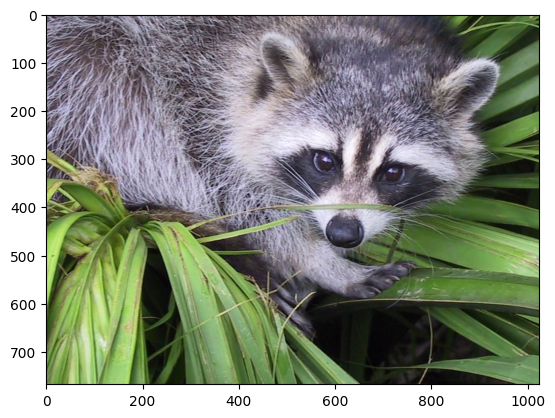

In [5]:
plt.imshow(img)
plt.show()

In [6]:
img.shape

(768, 1024, 3)

In [7]:
img.ndim

3

In [8]:
img[:, :, 0]

array([[121, 138, 153, ..., 119, 131, 139],
       [ 89, 110, 130, ..., 118, 134, 146],
       [ 73,  94, 115, ..., 117, 133, 144],
       ...,
       [ 87,  94, 107, ..., 120, 119, 119],
       [ 85,  95, 112, ..., 121, 120, 120],
       [ 85,  97, 111, ..., 120, 119, 118]], dtype=uint8)

In [9]:
img[:, :, 0].shape

(768, 1024)

In [10]:
img_array = img / 255

In [11]:
img_array.max(), img_array.min()

(1.0, 0.0)

In [12]:
img_array.dtype, img.dtype

(dtype('float64'), dtype('uint8'))

In [13]:
from numpy import linalg

In [14]:
img_gray = img_array @ [0.2126, 0.7152, 0.0722]
img_gray.shape

(768, 1024)

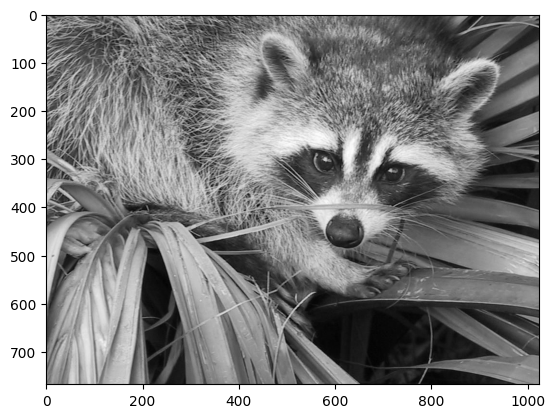

In [16]:
plt.imshow(img_gray, cmap='gray')
plt.show()

In [17]:
U, s, Vt = linalg.svd(img_gray)

In [18]:
U.shape, s.shape, Vt.shape

((768, 768), (768,), (1024, 1024))

In [20]:
Sigma = np.zeros((U.shape[1], Vt.shape[0]))
np.fill_diagonal(Sigma, s)

In [21]:
linalg.norm(img_gray - U @ Sigma @ Vt)

1.334653441603559e-12

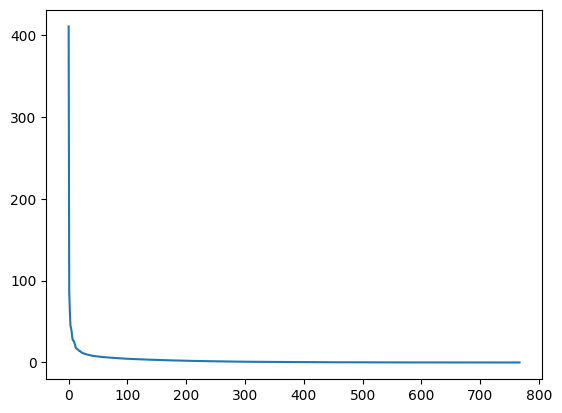

In [22]:
plt.plot(s);

In [25]:
k = 100

approx = U @ Sigma[:, :k] @ Vt[:k, :]

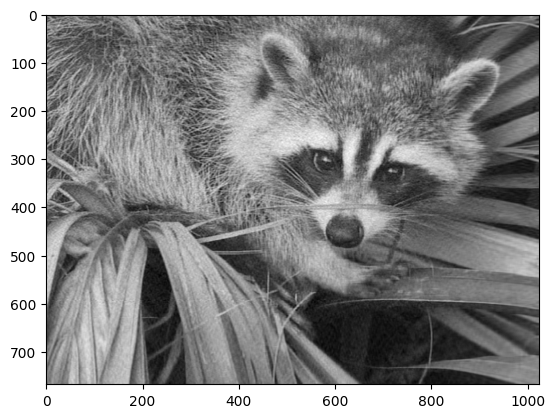

In [26]:
plt.imshow(approx, cmap='gray');

In [27]:
img_array_transposed = np.transpose(img_array, (2, 0, 1))
img_array_transposed.shape

(3, 768, 1024)

In [28]:
U, s, Vt = linalg.svd(img_array_transposed)
U.shape, s.shape, Vt.shape

((3, 768, 768), (3, 768), (3, 1024, 1024))

In [29]:
Sigma = np.zeros(img_array_transposed.shape)

for j in range(3):
    np.fill_diagonal(Sigma[j, :, :], s[j, :])

In [30]:
reconstructed = U @ Sigma @ Vt

In [31]:
reconstructed.shape

(3, 768, 1024)

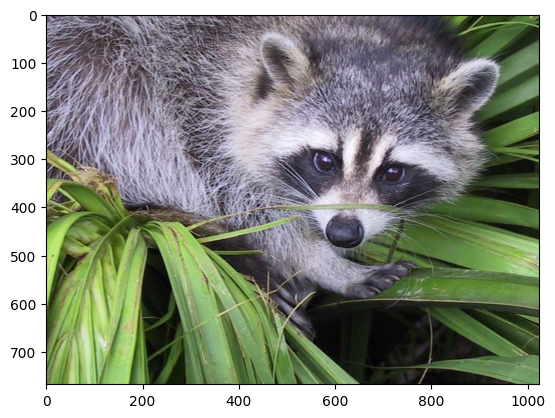

In [32]:
reconstructed = np.clip(reconstructed, 0, 1)
plt.imshow(np.transpose(reconstructed, (1, 2, 0)));

In [33]:
approx_img = U @ Sigma[..., :k] @ Vt[:, :k, :]

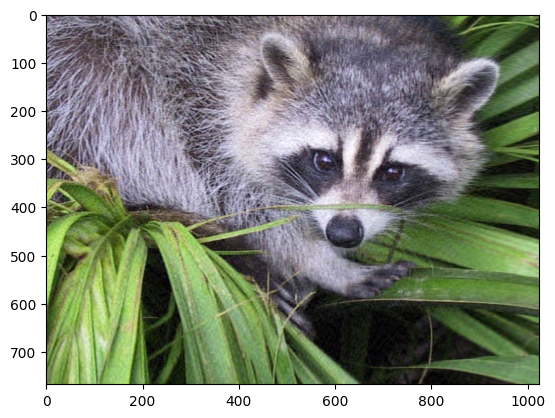

In [35]:
approx_img = np.clip(approx_img, 0, 1)
plt.imshow(np.transpose(approx_img, (1, 2, 0)));

In [36]:
import skimage as ski
camera = ski.data.camera()
type(camera)

ModuleNotFoundError: No module named 'skimage'

# Saving and sharing your Numpy arrays

In [37]:
x = np.arange(10)
y = x ** 2

print(x)
print(y)

[0 1 2 3 4 5 6 7 8 9]
[ 0  1  4  9 16 25 36 49 64 81]


In [38]:
np.savez('x_y-squared.npz', x_axis=x, y_axis=y)

In [39]:
del x, y

In [40]:
%whos

Variable               Type        Data/Info
--------------------------------------------
Sigma                  ndarray     3x768x1024: 2359296 elems, type `float64`, 18874368 bytes (18.0 Mb)
U                      ndarray     3x768x768: 1769472 elems, type `float64`, 14155776 bytes (13.5 Mb)
Vt                     ndarray     3x1024x1024: 3145728 elems, type `float64`, 25165824 bytes (24.0 Mb)
approx                 ndarray     768x1024: 786432 elems, type `float64`, 6291456 bytes (6.0 Mb)
approx_img             ndarray     3x768x1024: 2359296 elems, type `float64`, 18874368 bytes (18.0 Mb)
face                   function    <function face at 0x7f05bc6b93a0>
img                    ndarray     768x1024x3: 2359296 elems, type `uint8`, 2359296 bytes (2.25 Mb)
img_array              ndarray     768x1024x3: 2359296 elems, type `float64`, 18874368 bytes (18.0 Mb)
img_array_transposed   ndarray     3x768x1024: 2359296 elems, type `float64`, 18874368 bytes (18.0 Mb)
img_gray               nd

In [41]:
load_xy = np.load('x_y-squared.npz')
print(load_xy.files)

['x_axis', 'y_axis']


In [42]:
%whos

Variable               Type        Data/Info
--------------------------------------------
Sigma                  ndarray     3x768x1024: 2359296 elems, type `float64`, 18874368 bytes (18.0 Mb)
U                      ndarray     3x768x768: 1769472 elems, type `float64`, 14155776 bytes (13.5 Mb)
Vt                     ndarray     3x1024x1024: 3145728 elems, type `float64`, 25165824 bytes (24.0 Mb)
approx                 ndarray     768x1024: 786432 elems, type `float64`, 6291456 bytes (6.0 Mb)
approx_img             ndarray     3x768x1024: 2359296 elems, type `float64`, 18874368 bytes (18.0 Mb)
face                   function    <function face at 0x7f05bc6b93a0>
img                    ndarray     768x1024x3: 2359296 elems, type `uint8`, 2359296 bytes (2.25 Mb)
img_array              ndarray     768x1024x3: 2359296 elems, type `float64`, 18874368 bytes (18.0 Mb)
img_array_transposed   ndarray     3x768x1024: 2359296 elems, type `float64`, 18874368 bytes (18.0 Mb)
img_gray               nd

In [43]:
x = load_xy['x_axis']
y = load_xy['y_axis']

print(x)
print(y)

[0 1 2 3 4 5 6 7 8 9]
[ 0  1  4  9 16 25 36 49 64 81]


In [47]:
array_out = np.block([x[:, np.newaxis], y[:, np.newaxis]])
print(array_out.shape)
print(array_out)

(10, 2)
[[ 0  0]
 [ 1  1]
 [ 2  4]
 [ 3  9]
 [ 4 16]
 [ 5 25]
 [ 6 36]
 [ 7 49]
 [ 8 64]
 [ 9 81]]


In [48]:
np.savetxt('x_y-squared.csv', X=array_out, header='x, y', delimiter=',')

In [49]:
!head x_y-squared.csv

# x, y
0.000000000000000000e+00,0.000000000000000000e+00
1.000000000000000000e+00,1.000000000000000000e+00
2.000000000000000000e+00,4.000000000000000000e+00
3.000000000000000000e+00,9.000000000000000000e+00
4.000000000000000000e+00,1.600000000000000000e+01
5.000000000000000000e+00,2.500000000000000000e+01
6.000000000000000000e+00,3.600000000000000000e+01
7.000000000000000000e+00,4.900000000000000000e+01
8.000000000000000000e+00,6.400000000000000000e+01


In [50]:
del x, y

In [51]:
load_xy = np.loadtxt('x_y-squared.csv', delimiter=',')

In [52]:
load_xy.shape

(10, 2)

In [53]:
x = load_xy[:, 0]
y = load_xy[:, 1]
print(x)
print(y)

[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
[ 0.  1.  4.  9. 16. 25. 36. 49. 64. 81.]


In [54]:
load_xy.dtype == 'float64'

True

In [55]:
load_xy.shape == (10, 2)

True

# Masked Arrays

In [56]:
!curl https://raw.githubusercontent.com/CSSEGISandData/COVID-19/refs/heads/master/who_covid_19_situation_reports/who_covid_19_sit_rep_time_series/who_covid_19_sit_rep_time_series.csv -o who_covid_19_sit_rep_time_series.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  155k  100  155k    0     0   164k      0 --:--:-- --:--:-- --:--:--  164k


In [57]:
import os

file_path = os.getcwd()
file_name = os.path.join(file_path, 'who_covid_19_sit_rep_time_series.csv')

In [59]:
dates = np.genfromtxt(
    file_name,
    dtype=np.str_,
    delimiter=',',
    max_rows=1,
    usecols=range(4, 18),
    encoding='utf-8-sig',
)

locations = np.genfromtxt(
    file_name,
    dtype=np.str_,
    delimiter=',',
    skip_header=6,
    usecols=(0, 1),
    encoding='utf-8-sig',
)

nbcases = np.genfromtxt(
    file_name,
    dtype=np.int_,
    delimiter=',',
    skip_header=6,
    usecols=range(4, 18),
    encoding='utf-8-sig',
)

Text(0.5, 1.0, 'COVID-19 cumulative cases from Jan 21 to Feb 3 2020')

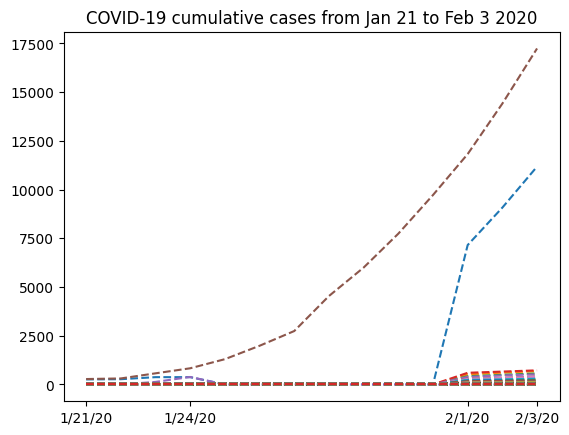

In [60]:
selected_dates = [0, 3, 11, 13]
plt.plot(dates, nbcases.T, '--')
plt.xticks(selected_dates, dates[selected_dates])
plt.title('COVID-19 cumulative cases from Jan 21 to Feb 3 2020')

In [61]:
dates

array(['1/21/20', '1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20',
       '1/27/20', '1/28/20', '1/29/20', '1/30/20', '1/31/20', '2/1/20',
       '2/2/20', '2/3/20'], dtype='<U7')

In [62]:
nbcases.shape

(264, 14)

In [63]:
locations.shape

(264, 2)

In [64]:
locations

array([['Hubei ', 'China'],
       ['Guangdong', 'China'],
       ['Henan', 'China'],
       ['Zhejiang', 'China'],
       ['Hunan', 'China'],
       ['Anhui', 'China'],
       ['Jiangxi', 'China'],
       ['Shandong', 'China'],
       ['Jiangsu', 'China'],
       ['Chongqing', 'China'],
       ['Sichuan', 'China'],
       ['Heilongjiang', 'China'],
       ['Beijing', 'China'],
       ['Shanghai', 'China'],
       ['Hebei', 'China'],
       ['Fujian', 'China'],
       ['Guangxi', 'China'],
       ['Shaanxi', 'China'],
       ['Yunnan', 'China'],
       ['Hainan', 'China'],
       ['Guizhou', 'China'],
       ['Tianjin', 'China'],
       ['Shanxi', 'China'],
       ['Liaoning', 'China'],
       ['Hong Kong', 'China'],
       ['Jilin', 'China'],
       ['Gansu', 'China'],
       ['Xinjiang', 'China'],
       ['Inner Mongolia', 'China'],
       ['Ningxia', 'China'],
       ['Taiwan', 'China'],
       ['Qinghai', 'China'],
       ['Macau', 'China'],
       ['Xizang', 'China'],
       ['Uns

In [65]:
totals_row = 35
locations = np.delete(locations, (totals_row), axis=0)
nbcases = np.delete(nbcases, (totals_row), axis=0)

china_total = nbcases[locations[:, 1] == 'China'].sum(axis=0)
china_total

array([  247,   288,   556,   817,   -22,   -22,   -15,   -10,    -9,
          -7,    -4, 11820, 14410, 17237])

In [66]:
nbcases_ma = np.ma.masked_values(nbcases, -1)

In [67]:
nbcases_ma

masked_array(
  data=[[258, 270, 375, ..., 7153, 9074, 11177],
        [14, 17, 26, ..., 520, 604, 683],
        [--, 1, 1, ..., 422, 493, 566],
        ...,
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --]],
  mask=[[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [ True, False, False, ..., False, False, False],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]],
  fill_value=-1)

Text(0.5, 1.0, 'COVID-19 cumulative cases from Jan 21 to Feb 3 2020')

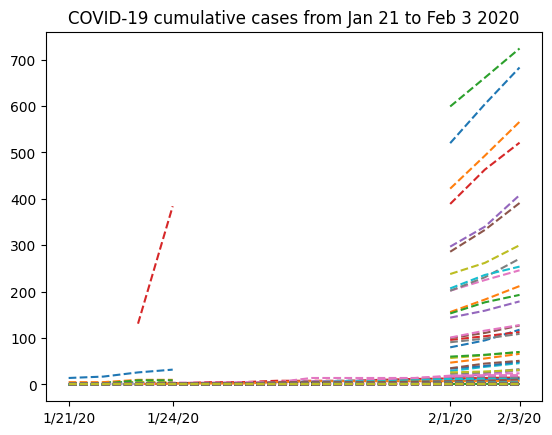

In [69]:
plt.plot(dates, nbcases_ma[1:].T, '--')
plt.xticks(selected_dates, dates[selected_dates])
plt.title('COVID-19 cumulative cases from Jan 21 to Feb 3 2020')

In [70]:
nbcases_ma[1:]

masked_array(
  data=[[14, 17, 26, ..., 520, 604, 683],
        [--, 1, 1, ..., 422, 493, 566],
        [--, 5, 5, ..., 599, 661, 724],
        ...,
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --]],
  mask=[[False, False, False, ..., False, False, False],
        [ True, False, False, ..., False, False, False],
        [ True, False, False, ..., False, False, False],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]],
  fill_value=-1)

In [71]:
china_masked = nbcases_ma[locations[:, 1] == 'China'].sum(axis=0)
china_masked

masked_array(data=[278, 309, 574, 835, 10, 10, 17, 22, 23, 25, 28, 11821,
                   14411, 17238],
             mask=[False, False, False, False, False, False, False, False,
                   False, False, False, False, False, False],
       fill_value=999999)

In [76]:
china_mask = (
    (locations[:, 1] == 'China')
    & (locations[:, 0] != 'Hong Kong')
    & (locations[:, 0] != 'Taiwan')
    & (locations[:, 0] != 'Macau')
    & (locations[:, 0] != 'Unspecified*')
)

In [74]:
china_mask.nonzero()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 25, 26, 27, 28, 29, 30, 31, 33]),)

In [77]:
china_total = nbcases_ma[china_mask].sum(axis=0)
china_total

masked_array(data=[278, 308, 440, 446, --, --, --, --, --, --, --, 11791,
                   14380, 17205],
             mask=[False, False, False, False,  True,  True,  True,  True,
                    True,  True,  True, False, False, False],
       fill_value=999999)

In [78]:
dates.shape, china_total.shape

((14,), (14,))

Text(0.5, 1.0, 'COVID-19 cumulative cases from Jan 21 to Feb 3 2020')

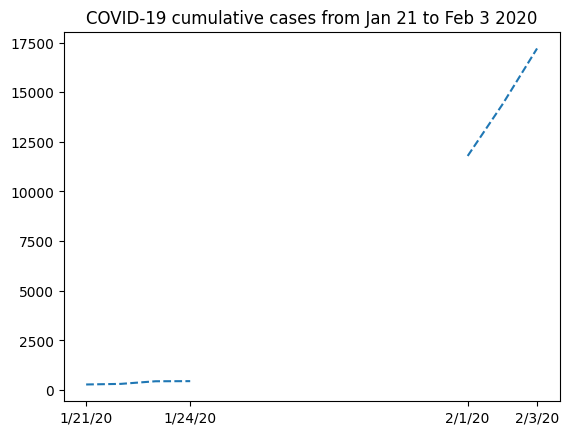

In [80]:
plt.plot(dates, china_total, '--')
plt.xticks(selected_dates, dates[selected_dates])
plt.title('COVID-19 cumulative cases from Jan 21 to Feb 3 2020')

In [81]:
china_total.mask

array([False, False, False, False,  True,  True,  True,  True,  True,
        True,  True, False, False, False])

In [82]:
invalid = china_total[china_total.mask]
invalid

masked_array(data=[--, --, --, --, --, --, --],
             mask=[ True,  True,  True,  True,  True,  True,  True],
       fill_value=999999,
            dtype=int64)

In [83]:
valid = china_total[~china_total.mask]
valid

masked_array(data=[278, 308, 440, 446, 11791, 14380, 17205],
             mask=[False, False, False, False, False, False, False],
       fill_value=999999)

In [84]:
dates[~china_total.mask]

array(['1/21/20', '1/22/20', '1/23/20', '1/24/20', '2/1/20', '2/2/20',
       '2/3/20'], dtype='<U7')

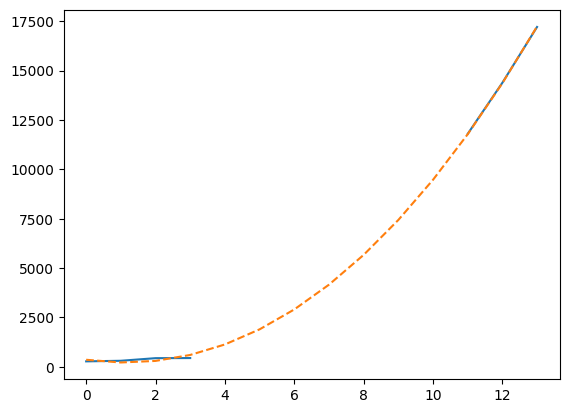

In [85]:
t = np.arange(len(china_total))
model = np.polynomial.Polynomial.fit(t[~china_total.mask], valid, deg=3)
plt.plot(t, china_total)
plt.plot(t, model(t), '--');

Text(0.5, 1.0, 'COVID-19 cumulative cases from Jan 21 to Feb 3 2020 - Mainland China\nCubic estimate for 7 days after start')

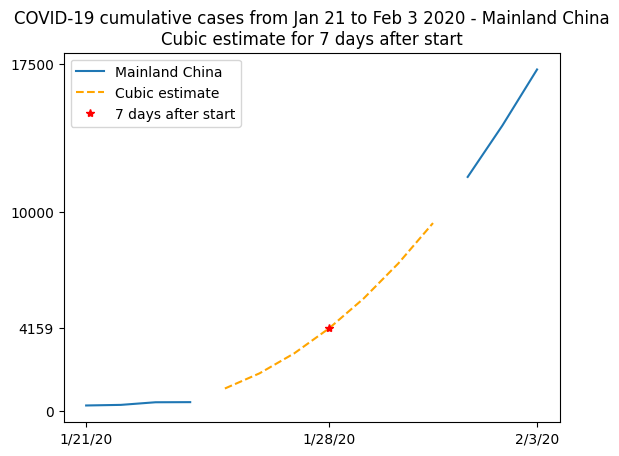

In [86]:
plt.plot(t, china_total)
plt.plot(t[china_total.mask], model(t)[china_total.mask], '--', color='orange')
plt.plot(7, model(7), 'r*')
plt.xticks([0, 7, 13], dates[[0, 7, 13]])
plt.yticks([0, model(7), 10000, 17500])
plt.legend(['Mainland China', 'Cubic estimate', '7 days after start'])
plt.title(
    "COVID-19 cumulative cases from Jan 21 to Feb 3 2020 - Mainland China\n"
    "Cubic estimate for 7 days after start"
)